In [1]:
# !pip install gym
# !pip install gym[atari]
# !pip install autorom[accept-rom-license]
# !pip install torch
# !pip install wandb -qU

In [3]:
import gym 
import matplotlib.pyplot as plt
import torch
from PIL import Image
import wandb
# importing variables and models
from model import *
from variables import *
from utils import *
from torchvision import transforms

/home/peppe/miniconda3/envs/my_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A.L.E: Arcade Learning Environment (version 0.8.0+919230b)
[Powered by Stella]


In [4]:
if wb:
    wandb.login()

In [5]:
load = True # When training this is false.
# 
#

seed_list = [30, 90, 60]
agent = Policy(model_name = 'r_only_extrinsic_agent.pt', ext = True, intr = False, load = load)

# agent.trainer(training_episodes)
# maximum = 0
# for i in range(1):
#     agent = Policy(model_name = 'r_only_intrinsic_agent.pt', ext = False, intr = True, seed = seed_list[i], maximum = maximum, load = load)
#     agent.trainer(n_training_episodes=training_episodes, exp_name= 'new_r_agent_only_intrinsic_reward_test_{}'.format(i+1) ) # only extrinsic: 0, only intrinsic: 1, extrinsic + intrinsic: 2
#     maximum = agent.maximum
# maximum = 0
# for i in range(1):
#     agent = Policy(model_name = 'r_extrinsic_intrinsic_agent.pt', ext = True, intr = True, seed = seed_list[i], maximum = maximum, load = load)
#     agent.trainer(n_training_episodes=training_episodes, exp_name= 'new_r_agent_extrinsic_intrinsic_reward_test_{}'.format(i+1) ) # only extrinsic: 0, only intrinsic: 1, extrinsic + intrinsic: 2
#     maximum = agent.maximum
# maximum = 0
# for i in range(1):
#     agent = Policy(model_name = 'r_only_extrinsic_agent.pt', ext = True, intr = False, seed = seed_list[i], maximum = maximum, load = load)
#     agent.trainer(n_training_episodes=training_episodes, exp_name= 'new_r_agent_only_extrinsic_reward_test_{}'.format(i+1) ) # only extrinsic: 0, only intrinsic: 1, extrinsic + intrinsic: 2
#     maximum = agent.maximum

/home/peppe/miniconda3/envs/my_env/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [6]:
agent.load()
evaluate_agent(agent, n_eval_episodes = 5, render = True)  # Intrinsic: 945 mean, Extrinsic: 1386

/home/peppe/miniconda3/envs/my_env/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


998.0

## Set-up the game

In [9]:
phoenix = "ALE/Phoenix-v5"
space_invaders = "ALE/SpaceInvaders-v5"
assault = "ALE/Assault-v5"



game = env_id = phoenix

env = gym.make(env_id, render_mode = 'human')


## Show some steps of the chosen game

In [61]:
env.reset()
rewards_list = []
for episode in range(1):
        total_reward = 0
        done = False
        s, _ = env.reset()
        rew_list = 0
        while not done:
            
            action = env.action_space.sample()
            s, reward, done, truncated, info = env.step(action)
   
            # env.render()
            rew_list+=reward
        rewards_list.append(rew_list)
print(sum(rewards_list)/len(rewards_list))


970.0


In [ ]:
# observation = env.reset()

# for i in range(25):
  
#   if i > 20:
#     print(observation.shape)
#     plt.imshow(observation[10:187,:,:])#    phoenix: observation[17:179,:,:]), space_invaders: observation[20:195,:,:], assault: observation[10:187,:,:]
#     plt.show()

#   observation, _, _, _, _ = env.step(1)

### Display the result of the image transformation.

In [8]:
phoenix_game = np.load('./images/phoenix.npy')
space_invaders_game = np.load('./images/space_invaders.npy')
assault_game = np.load('./images/assault.npy')

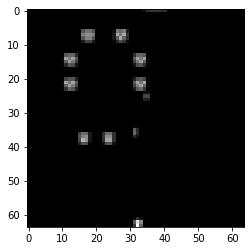

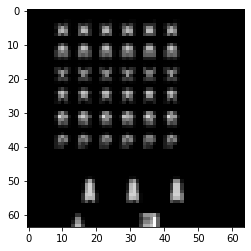

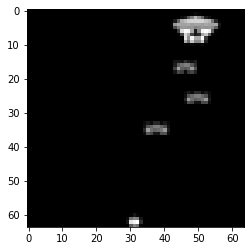

In [9]:
import time
def plot_nparray_with_torch_transform(np_array):
    ''' This function takes as input a numpy array, it applies all the desired transformation with torchvision.transforms, and then it display the new representation 
        INPUT: np_array: It's a numpy array,
        OUTPUT: ----        '''
    observation_new = transform(Image.fromarray(np_array))
    observation_new = np.array(observation_new)/255
    plt.imshow((observation_new), cmap = 'gray')
    plt.show()

plot_nparray_with_torch_transform(phoenix_game)
time.sleep(1)
plot_nparray_with_torch_transform(space_invaders_game)
time.sleep(1)
plot_nparray_with_torch_transform(assault_game)
